# ***CLASSIFICATION RECURRENT NEURAL NETWORK***

# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import scipy as sp
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, SimpleRNN

from keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD, Nadam, RMSprop, Adamax

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from google.colab import drive

# ***DATASET***

In [ ]:
# Mount (hubungkan) Google Drive
drive.mount('/content/drive')

df = pd.read_excel("/content/drive/MyDrive/Tes TA/ResultWHF_Final.xlsx")
df = df.drop('Unnamed: 0', axis=1)
df

Mounted at /content/drive


,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.008607,0.007897,0.039544,0.048679,0.009459,0.073796,0.021936,0.479167,0.004787,...,0.001108,0.014243,0.012598,0.012243,0.016880,0.016982,0.016497,0.009025,0.014855,0.006152
1,17 Again,0.016367,0.009451,0.031694,0.450000,0.013552,0.082375,0.024298,0.666667,0.007769,...,0.003718,0.025693,0.008218,0.018990,0.015203,0.022129,0.021279,0.019790,0.020728,0.008680
2,1BR,0.011248,0.009059,0.034382,0.048536,0.008593,0.063243,0.026599,0.604167,0.006286,...,0.002345,0.021759,0.014287,0.012539,0.021034,0.018767,0.016806,0.011005,0.015073,0.008711
3,3 Days to Kill,0.568000,0.011520,0.042966,0.500000,0.015118,0.578431,0.024501,0.645833,0.010896,...,0.002912,0.026005,0.016983,0.015907,0.025683,0.025632,0.026421,0.017314,0.053274,0.013583
4,3 Idiots,0.014656,0.011121,0.450000,0.051974,0.015630,0.076338,0.026803,0.875000,0.011154,...,0.001957,0.019309,0.488000,0.011210,0.015360,0.019553,0.027809,0.014450,0.143271,0.009357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.035655,0.572000,0.085759,0.070119,0.662037,0.077515,0.515294,0.572917,0.670000,...,0.048182,0.051360,0.033040,0.038025,0.032488,0.034515,0.786082,0.815556,0.036138,0.564211
548,Young Adult,0.550000,0.008806,0.534000,0.598000,0.013247,0.531863,0.642353,0.656250,0.006481,...,0.003370,0.032518,0.009441,0.027984,0.020795,0.690000,0.023211,0.022299,0.045592,0.010070
549,Your Place or Mine,0.016310,0.608000,0.500000,0.043629,0.678241,0.066019,0.027110,0.593750,0.634000,...,0.004672,0.022902,0.011292,0.510588,0.014141,0.018423,0.806701,0.808889,0.013861,0.139490
550,Zodiac,0.009480,0.011303,0.642000,0.048294,0.006798,0.919118,0.026150,0.802083,0.004912,...,0.001590,0.015982,0.015725,0.009581,0.013570,0.024171,0.018091,0.011047,0.676000,0.006485


# ***PRE-PROCESSING***

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 0
Persentase sparsity: 0.00%


## ***LABELLING***

In [ ]:
df.index

RangeIndex(start=0, stop=552, step=1)

In [ ]:
df.columns

Index(['nama film', 'AnakNonton', 'BFI', 'CenayangFilm', 'Elbert_Reyner',
       'ErikDavis', 'GilaFilmID', 'HabisNontonFilm', 'IMDB', 'KermodeMovie',
       'Metacritic Metascore', 'Metacritic User Score', 'MintzPlasse',
       'MovieManID', 'Rivki_Mogi', 'RottenTomatoes Audience Score',
       'RottenTomatoes Tomato Meter', 'ScreenSaversID', 'TarizSolis',
       'WatchmenID', 'aerorun', 'akstanwyck', 'alisonwillmore', 'arulfittron',
       'asliga', 'bicaraboxoffice', 'cinemuach', 'commaditya', 'danieldokter',
       'djaycoholyc', 'eug', 'hafilova', 'kampusfilmID', 'moviegoersID',
       'moviemenfes', 'ngobrolinpilem', 'paradigmafilm', 'rayculz',
       'sinema911', 'sinemagerbanget', 'sir_amirsyarif', 'slashfilm',
       'teppy87', 'winseulbear', 'zavvi'],
      dtype='object')

In [ ]:
len(df.columns)

45

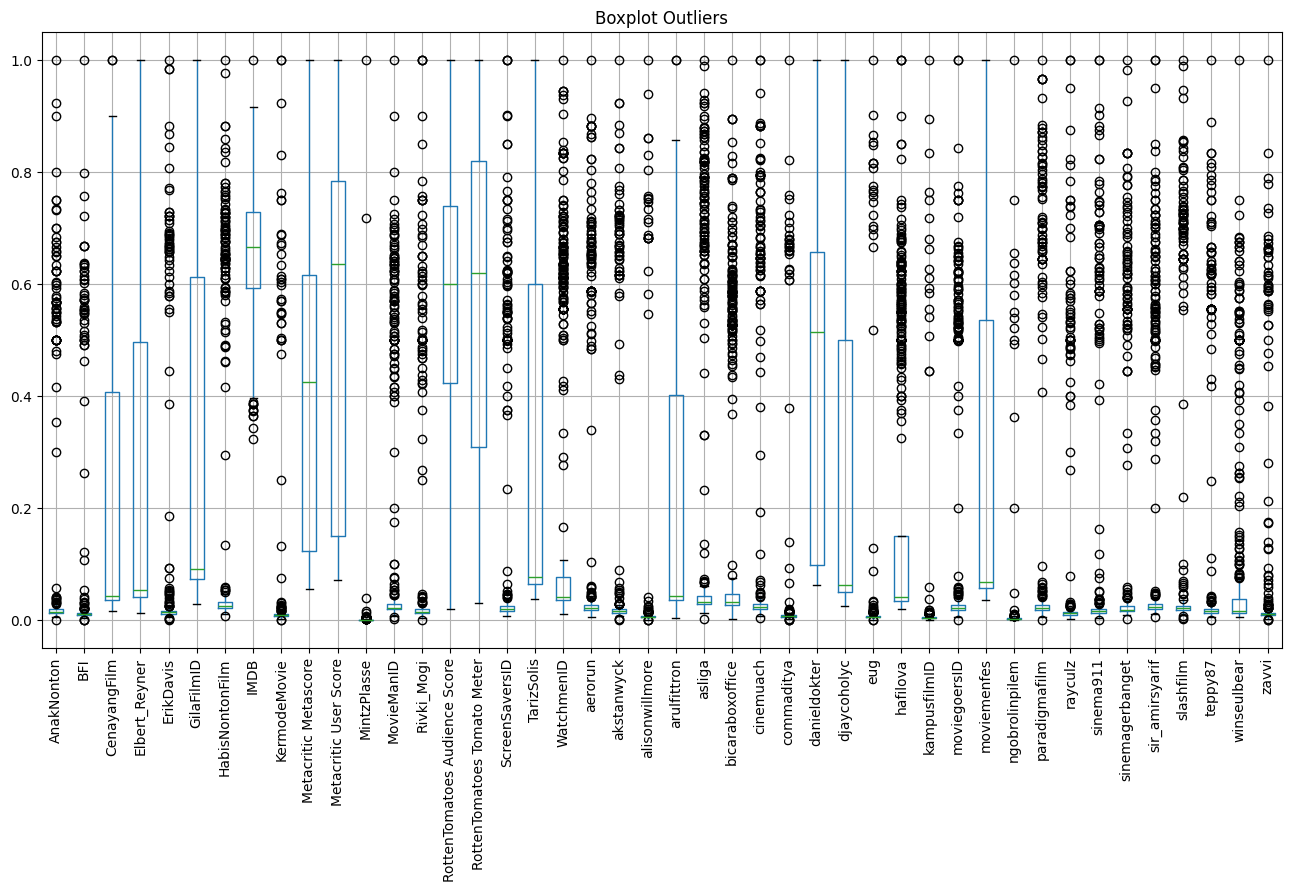

In [ ]:
df_prepro = df.copy()
df_prepro = df_prepro.drop(columns=['nama film'])

plt.figure(figsize=(16, 8))
df_prepro.boxplot(rot=90)
plt.title('Boxplot Outliers')
plt.show()

## ***Convert to 0-1***

In [ ]:
df_klasifikasi = df.copy()

for index, row in df_klasifikasi.iterrows():
    for column in df_klasifikasi.columns[1:]:
        if row[column] > 0.5:
            df_klasifikasi.at[index, column] = 1
        else:
            df_klasifikasi.at[index, column] = 0

df_klasifikasi.to_excel("/content/drive/MyDrive/Tes TA/Klasifikasi_RNN.xlsx")
df_klasifikasi

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17 Again,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1BR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3 Days to Kill,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3 Idiots,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
548,Young Adult,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
549,Your Place or Mine,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
550,Zodiac,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## ***CALCULATE THE VALUES 0 AND 1***

In [ ]:
# mencari jumlah nilai 0 dan 1
nilai1 = 0
nilai0 = 0

for i in df_klasifikasi.index:
    for j in df_klasifikasi.columns:
        if df_klasifikasi.loc[i][j] == 1:
            nilai1 += 1
        else:
            nilai0 += 1

print("Total Rating yang bernilai 0: ", nilai0)
print("Total Rating yang bernilai 1: ", nilai1)

Total Rating yang bernilai 0:  20120
Total Rating yang bernilai 1:  4720


# ***DATA DISTRIBUTION***

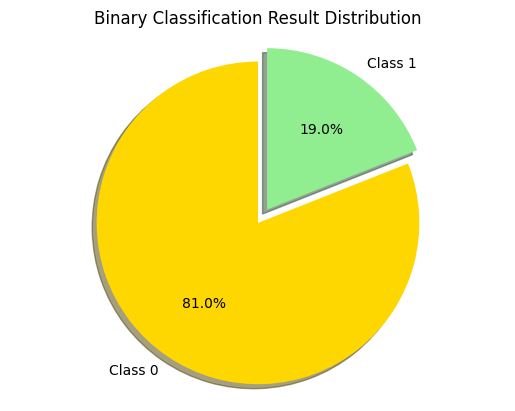

In [ ]:
labels = 'Class 0', 'Class 1'
sizes = [nilai0, nilai1]
colors = ['gold', 'lightgreen']
explode = (0.1, 0)

# pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Binary Classification Result Distribution")
plt.show()

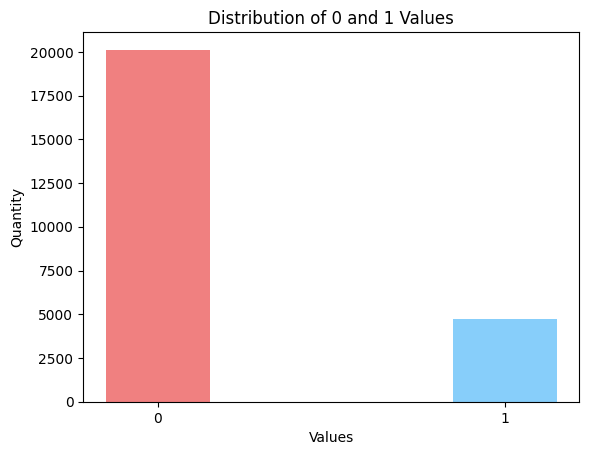

In [ ]:
labels = ['0', '1']
sizes = [nilai0, nilai1]
colors = ['lightcoral', 'lightskyblue']

plt.bar(labels, sizes, color=colors, width=0.3)
plt.title("Distribution of 0 and 1 Values")
plt.xlabel("Values")
plt.ylabel("Quantity")
plt.show()

# **KLASIFIKASI RNN**

In [ ]:
df = df_klasifikasi.copy()
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.columns

Index(['AnakNonton', 'BFI', 'CenayangFilm', 'Elbert_Reyner', 'ErikDavis',
       'GilaFilmID', 'HabisNontonFilm', 'IMDB', 'KermodeMovie',
       'Metacritic Metascore', 'Metacritic User Score', 'MintzPlasse',
       'MovieManID', 'Rivki_Mogi', 'RottenTomatoes Audience Score',
       'RottenTomatoes Tomato Meter', 'ScreenSaversID', 'TarizSolis',
       'WatchmenID', 'aerorun', 'akstanwyck', 'alisonwillmore', 'arulfittron',
       'asliga', 'bicaraboxoffice', 'cinemuach', 'commaditya', 'danieldokter',
       'djaycoholyc', 'eug', 'hafilova', 'kampusfilmID', 'moviegoersID',
       'moviemenfes', 'ngobrolinpilem', 'paradigmafilm', 'rayculz',
       'sinema911', 'sinemagerbanget', 'sir_amirsyarif', 'slashfilm',
       'teppy87', 'winseulbear', 'zavvi'],
      dtype='object')

In [ ]:
len(df.columns)

44

# ***BASELINE***

## **90 : 10**

***MODELING***

In [ ]:
acc1 = []
val_acc1 = []
loss1 = []
val_loss1 = []

precRNN1 = []
recRNN1 = []
f1RNN1 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    history1 = model1.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1.append(history1.history['accuracy'])
    val_acc1.append(history1.history['val_accuracy'])
    loss1.append(history1.history['loss'])
    val_loss1.append(history1.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN1.append(prec)
    recRNN1.append(rec)
    f1RNN1.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1)))
print("Minimum Accuracy: {}".format(np.min(acc1)))
print("Maximum Accuracy: {}".format(np.max(acc1)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1)))
print("Minimum Loss: {}".format(np.min(loss1)))
print("Maximum Loss: {}".format(np.max(loss1)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1)))
print("Minimum Precision: {}".format(np.min(precRNN1)))
print("Maximum Precision: {}".format(np.max(precRNN1)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1)))
print("Minimum Recall: {}".format(np.min(recRNN1)))
print("Maximum Recall: {}".format(np.max(recRNN1)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1)))
print("=====================================")

Average Accuracy: 0.8548180350751587
Minimum Accuracy: 0.5032351613044739
Maximum Accuracy: 0.9979838728904724
Average Loss: 0.3648298789620061
Minimum Loss: 0.017327269539237022
Maximum Loss: 0.7884413003921509
Average Precision: 0.8116700336126713
Minimum Precision: 0.5625
Maximum Precision: 0.9824797843665768
Average Recall: 0.8591720779220782
Minimum Recall: 0.5714285714285714
Maximum Recall: 0.9821428571428571
Average F1-Score: 0.8286288744702938
Minimum F1-Score: 0.5741652983032293
Maximum F1-Score: 0.980952380952381


## **80 : 20**

***MODELING***

In [ ]:
acc2 = []
val_acc2 = []
loss2 = []
val_loss2 = []

precRNN2 = []
recRNN2 = []
f1RNN2 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model2.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    history2 = model2.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2.append(history2.history['accuracy'])
    val_acc2.append(history2.history['val_accuracy'])
    loss2.append(history2.history['loss'])
    val_loss2.append(history2.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN2.append(prec)
    recRNN2.append(rec)
    f1RNN2.append(f1)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Dummy data dummy format (harus kamu sesuaikan)
# df = ...

acc2 = []
val_acc2 = []
loss2 = []
val_loss2 = []

precRNN2 = []
recRNN2 = []
f1RNN2 = []

sequence_length = 43  # jumlah fitur

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # Tambahkan channel untuk input
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)

    # Model RNN
    model2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    loss_fn = tf.keras.losses.BinaryCrossentropy()
    learning_rate = 0.01
    batch_size = 128
    epochs = 30

    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

    epoch_acc = []
    epoch_loss = []

    for epoch in range(epochs):
        total_loss = 0.0
        correct = 0
        total = 0

        for step, (x_batch, y_batch) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                logits = model2(x_batch, training=True)
                loss_value = loss_fn(y_batch, logits)

            grads = tape.gradient(loss_value, model2.trainable_weights)

            # Update bobot secara manual (tanpa optimizer)
            for w, g in zip(model2.trainable_weights, grads):
                w.assign_sub(learning_rate * g)

            total_loss += loss_value.numpy()

            # Hitung akurasi sederhana
            preds = tf.cast(logits > 0.5, tf.int32)
            correct += tf.reduce_sum(tf.cast(preds == tf.cast(y_batch, tf.int32), tf.int32)).numpy()
            total += np.prod(y_batch.shape)

        epoch_loss.append(total_loss / len(train_dataset))
        epoch_acc.append(correct / total)

    # Simpan hasil training
    acc2.append(epoch_acc)
    loss2.append(epoch_loss)

    # Evaluasi validasi
    Y_pred = model2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')

    precRNN2.append(prec)
    recRNN2.append(rec)
    f1RNN2.append(f1)


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2)))
print("Minimum Accuracy: {}".format(np.min(acc2)))
print("Maximum Accuracy: {}".format(np.max(acc2)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2)))
print("Minimum Loss: {}".format(np.min(loss2)))
print("Maximum Loss: {}".format(np.max(loss2)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2)))
print("Minimum Precision: {}".format(np.min(precRNN2)))
print("Maximum Precision: {}".format(np.max(precRNN2)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2)))
print("Minimum Recall: {}".format(np.min(recRNN2)))
print("Maximum Recall: {}".format(np.max(recRNN2)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2)))
print("=====================================")

Average Accuracy: 0.7950958725045104
Minimum Accuracy: 0.3899172071929547
Maximum Accuracy: 0.997046880767811
Average Loss: 0.4998231828212738
Minimum Loss: 0.17399410903453827
Maximum Loss: 0.8298124074935913
Average Precision: 0.7265776252540085
Minimum Precision: 0.43000237079184445
Maximum Precision: 0.9820631442253064
Average Recall: 0.8157248157248158
Minimum Recall: 0.4954954954954955
Maximum Recall: 0.990990990990991
Average F1-Score: 0.753013157049812
Minimum F1-Score: 0.4205254205254206
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3 = []
val_acc3 = []
loss3 = []
val_loss3 = []

precRNN3 = []
recRNN3 = []
f1RNN3 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model3.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    history3 = model3.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3.append(history3.history['accuracy'])
    val_acc3.append(history3.history['val_accuracy'])
    loss3.append(history3.history['loss'])
    val_loss3.append(history3.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN3.append(prec)
    recRNN3.append(rec)
    f1RNN3.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3)))
print("Minimum Accuracy: {}".format(np.min(acc3)))
print("Maximum Accuracy: {}".format(np.max(acc3)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3)))
print("Minimum Loss: {}".format(np.min(loss3)))
print("Maximum Loss: {}".format(np.max(loss3)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3)))
print("Minimum Precision: {}".format(np.min(precRNN3)))
print("Maximum Precision: {}".format(np.max(precRNN3)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3)))
print("Minimum Recall: {}".format(np.min(recRNN3)))
print("Maximum Recall: {}".format(np.max(recRNN3)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3)))
print("=====================================")

Average Accuracy: 0.847799161437786
Minimum Accuracy: 0.5181347131729126
Maximum Accuracy: 0.9974093437194824
Average Loss: 0.3857882252471013
Minimum Loss: 0.021651359274983406
Maximum Loss: 0.8113853931427002
Average Precision: 0.7882912311296356
Minimum Precision: 0.6281556347279248
Maximum Precision: 0.987988096966178
Average Recall: 0.841867469879518
Minimum Recall: 0.5542168674698795
Maximum Recall: 0.9939759036144579
Average F1-Score: 0.8006598992329309
Minimum F1-Score: 0.5437240188825477
Maximum F1-Score: 0.9909729552651695


## **60 : 40**

***MODELING***

In [ ]:
acc4 = []
val_acc4 = []
loss4 = []
val_loss4 = []

precRNN4 = []
recRNN4 = []
f1RNN4 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model4.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # train model
    history4 = model4.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4.append(history4.history['accuracy'])
    val_acc4.append(history4.history['val_accuracy'])
    loss4.append(history4.history['loss'])
    val_loss4.append(history4.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4.append(prec)
    recRNN4.append(rec)
    f1RNN4.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4)))
print("Minimum Accuracy: {}".format(np.min(acc4)))
print("Maximum Accuracy: {}".format(np.max(acc4)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4)))
print("Minimum Loss: {}".format(np.min(loss4)))
print("Maximum Loss: {}".format(np.max(loss4)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4)))
print("Minimum Precision: {}".format(np.min(precRNN4)))
print("Maximum Precision: {}".format(np.max(precRNN4)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4)))
print("Minimum Recall: {}".format(np.min(recRNN4)))
print("Maximum Recall: {}".format(np.max(recRNN4)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4)))
print("=====================================")

Average Accuracy: 0.856746112532688
Minimum Accuracy: 0.5034778714179993
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3638592191520288
Minimum Loss: 0.026751313358545303
Maximum Loss: 0.737295925617218
Average Precision: 0.8215456452603422
Minimum Precision: 0.6264212049521097
Maximum Precision: 0.9909707008456011
Average Recall: 0.8556149732620321
Minimum Recall: 0.665158371040724
Maximum Recall: 0.995475113122172
Average F1-Score: 0.8231611005774746
Minimum F1-Score: 0.6282479775126834
Maximum F1-Score: 0.993217799940489


# ***OPTIMIZER***

# ***Adam***

## **90 : 10**

***MODELING***

In [ ]:
acc1_1 = []
val_acc1_1 = []
loss1_1 = []
val_loss1_1 = []

precRNN1_1 = []
recRNN1_1  = []
f1RNN1_1 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1_1 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adam(learning_rate=0.01)

    model1_1.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history1_1 = model1_1.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1_1.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1_1.append(history1_1.history['accuracy'])
    val_acc1_1.append(history1_1.history['val_accuracy'])
    loss1_1.append(history1_1.history['loss'])
    val_loss1_1.append(history1_1.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN1_1.append(prec)
    recRNN1_1.append(rec)
    f1RNN1_1.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 410ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 449ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1_1)))
print("Minimum Accuracy: {}".format(np.min(acc1_1)))
print("Maximum Accuracy: {}".format(np.max(acc1_1)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1_1)))
print("Minimum Loss: {}".format(np.min(loss1_1)))
print("Maximum Loss: {}".format(np.max(loss1_1)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1_1)))
print("Minimum Precision: {}".format(np.min(precRNN1_1)))
print("Maximum Precision: {}".format(np.max(precRNN1_1)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1_1)))
print("Minimum Recall: {}".format(np.min(recRNN1_1)))
print("Maximum Recall: {}".format(np.max(recRNN1_1)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1_1)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1_1)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1_1)))
print("=====================================")

Average Accuracy: 0.842187678497849
Minimum Accuracy: 0.49296697974205017
Maximum Accuracy: 0.9979838728904724
Average Loss: 0.3901977544403494
Minimum Loss: 0.015009483322501183
Maximum Loss: 0.8371078968048096
Average Precision: 0.7925689876828755
Minimum Precision: 0.5541935483870968
Maximum Precision: 0.9646045918367346
Average Recall: 0.8469967532467532
Minimum Recall: 0.5535714285714286
Maximum Recall: 0.9821428571428571
Average F1-Score: 0.8030096355615565
Minimum F1-Score: 0.5127586206896552
Maximum F1-Score: 0.9732947232947232


## **80 : 20**

***MODELING***

In [ ]:
acc2_1 = []
val_acc2_1 = []
loss2_1 = []
val_loss2_1 = []

precRNN2_1 = []
recRNN2_1 = []
f1RNN2_1 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2_1 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adam(learning_rate=0.01)

    model2_1.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history2_1 = model2_1.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2_1.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2_1.append(history2_1.history['accuracy'])
    val_acc2_1.append(history2_1.history['val_accuracy'])
    loss2_1.append(history2_1.history['loss'])
    val_loss2_1.append(history2_1.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN2_1.append(prec)
    recRNN2_1.append(rec)
    f1RNN2_1.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2_1)))
print("Minimum Accuracy: {}".format(np.min(acc2_1)))
print("Maximum Accuracy: {}".format(np.max(acc2_1)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2_1)))
print("Minimum Loss: {}".format(np.min(loss2_1)))
print("Maximum Loss: {}".format(np.max(loss2_1)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2_1)))
print("Minimum Precision: {}".format(np.min(precRNN2_1)))
print("Maximum Precision: {}".format(np.max(precRNN2_1)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2_1)))
print("Minimum Recall: {}".format(np.min(recRNN2_1)))
print("Maximum Recall: {}".format(np.max(recRNN2_1)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2_1)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2_1)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2_1)))
print("=====================================")

Average Accuracy: 0.842379540475932
Minimum Accuracy: 0.4858935475349426
Maximum Accuracy: 0.997732400894165
Average Loss: 0.38550428078284094
Minimum Loss: 0.016853811219334602
Maximum Loss: 0.9820476174354553
Average Precision: 0.7043685132670809
Minimum Precision: 0.2730297865433
Maximum Precision: 0.9820631442253064
Average Recall: 0.8196150696150698
Minimum Recall: 0.5225225225225225
Maximum Recall: 0.990990990990991
Average F1-Score: 0.7507513109033422
Minimum F1-Score: 0.3586545125006663
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3_1 = []
val_acc3_1 = []
loss3_1 = []
val_loss3_1 = []

precRNN3_1 = []
recRNN3_1 = []
f1RNN3_1 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3_1 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adam(learning_rate=0.01)

    model3_1.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history3_1 = model3_1.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3_1.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3_1.append(history3_1.history['accuracy'])
    val_acc3_1.append(history3_1.history['val_accuracy'])
    loss3_1.append(history3_1.history['loss'])
    val_loss3_1.append(history3_1.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN3_1.append(prec)
    recRNN3_1.append(rec)
    f1RNN3_1.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3_1)))
print("Minimum Accuracy: {}".format(np.min(acc3_1)))
print("Maximum Accuracy: {}".format(np.max(acc3_1)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3_1)))
print("Minimum Loss: {}".format(np.min(loss3_1)))
print("Maximum Loss: {}".format(np.max(loss3_1)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3_1)))
print("Minimum Precision: {}".format(np.min(precRNN3_1)))
print("Maximum Precision: {}".format(np.max(precRNN3_1)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3_1)))
print("Minimum Recall: {}".format(np.min(recRNN3_1)))
print("Maximum Recall: {}".format(np.max(recRNN3_1)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3_1)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3_1)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3_1)))
print("=====================================")

Average Accuracy: 0.8358403026154547
Minimum Accuracy: 0.45921194553375244
Maximum Accuracy: 0.9974093437194824
Average Loss: 0.4009400277073975
Minimum Loss: 0.01900850608944893
Maximum Loss: 1.0947189331054688
Average Precision: 0.724946589566986
Minimum Precision: 0.33444621860937723
Maximum Precision: 0.987988096966178
Average Recall: 0.8247535596933188
Minimum Recall: 0.4879518072289157
Maximum Recall: 0.9939759036144579
Average F1-Score: 0.759687174036928
Minimum F1-Score: 0.41574593304091945
Maximum F1-Score: 0.9909729552651695


## **60 : 40**

***MODELING***

In [ ]:
acc4_1 = []
val_acc4_1 = []
loss4_1 = []
val_loss4_1 = []

precRNN4_1 = []
recRNN4_1 = []
f1RNN4_1 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4_1 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adam(learning_rate=0.01)

    model4_1.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history4_1 = model4_1.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4_1.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4_1.append(history4_1.history['accuracy'])
    val_acc4_1.append(history4_1.history['val_accuracy'])
    loss4_1.append(history4_1.history['loss'])
    val_loss4_1.append(history4_1.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4_1.append(prec)
    recRNN4_1.append(rec)
    f1RNN4_1.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4_1)))
print("Minimum Accuracy: {}".format(np.min(acc4_1)))
print("Maximum Accuracy: {}".format(np.max(acc4_1)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4_1)))
print("Minimum Loss: {}".format(np.min(loss4_1)))
print("Maximum Loss: {}".format(np.max(loss4_1)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4_1)))
print("Minimum Precision: {}".format(np.min(precRNN4_1)))
print("Maximum Precision: {}".format(np.max(precRNN4_1)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4_1)))
print("Minimum Recall: {}".format(np.min(recRNN4_1)))
print("Maximum Recall: {}".format(np.max(recRNN4_1)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4_1)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4_1)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4_1)))
print("=====================================")

Average Accuracy: 0.8454793503112865
Minimum Accuracy: 0.4524696171283722
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.38180880467548517
Minimum Loss: 0.021627575159072876
Maximum Loss: 0.9692649245262146
Average Precision: 0.7400815219595747
Minimum Precision: 0.31481746892979257
Maximum Precision: 0.9909707008456011
Average Recall: 0.8367955573837925
Minimum Recall: 0.5610859728506787
Maximum Recall: 0.995475113122172
Average F1-Score: 0.7775783291464117
Minimum F1-Score: 0.4033313659912125
Maximum F1-Score: 0.993217799940489


# ***Nadam***

## **90 : 10**

***MODELING***

In [ ]:
acc1_3 = []
val_acc1_3 = []
loss1_3 = []
val_loss1_3 = []

precRNN1_3 = []
recRNN1_3  = []
f1RNN1_3 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1_3 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Nadam(learning_rate=0.001)

    model1_3.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history1_3 = model1_3.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1_3.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1_3.append(history1_3.history['accuracy'])
    val_acc1_3.append(history1_3.history['val_accuracy'])
    loss1_3.append(history1_3.history['loss'])
    val_loss1_3.append(history1_3.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')


    precRNN1_3.append(prec)
    recRNN1_3.append(rec)
    f1RNN1_3.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1_3)))
print("Minimum Accuracy: {}".format(np.min(acc1_3)))
print("Maximum Accuracy: {}".format(np.max(acc1_3)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1_3)))
print("Minimum Loss: {}".format(np.min(loss1_3)))
print("Maximum Loss: {}".format(np.max(loss1_3)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1_3)))
print("Minimum Precision: {}".format(np.min(precRNN1_3)))
print("Maximum Precision: {}".format(np.max(precRNN1_3)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1_3)))
print("Minimum Recall: {}".format(np.min(recRNN1_3)))
print("Maximum Recall: {}".format(np.max(recRNN1_3)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1_3)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1_3)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1_3)))
print("=====================================")

Average Accuracy: 0.8616389060833237
Minimum Accuracy: 0.5111121535301208
Maximum Accuracy: 0.9979838728904724
Average Loss: 0.3474668170393191
Minimum Loss: 0.020619161427021027
Maximum Loss: 0.7255995869636536
Average Precision: 0.849331834540526
Minimum Precision: 0.6785714285714286
Maximum Precision: 0.9824797843665768
Average Recall: 0.8685064935064933
Minimum Recall: 0.6785714285714286
Maximum Recall: 0.9821428571428571
Average F1-Score: 0.8499543907353092
Minimum F1-Score: 0.671875
Maximum F1-Score: 0.980952380952381


## **80 : 20**

***MODELING***

In [ ]:
acc2_3 = []
val_acc2_3 = []
loss2_3 = []
val_loss2_3 = []

precRNN2_3 = []
recRNN2_3 = []
f1RNN2_3 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2_3 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Nadam(learning_rate=0.001)

    model2_3.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history2_3 = model2_3.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2_3.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2_3.append(history2_3.history['accuracy'])
    val_acc2_3.append(history2_3.history['val_accuracy'])
    loss2_3.append(history2_3.history['loss'])
    val_loss2_3.append(history2_3.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN2_3.append(prec)
    recRNN2_3.append(rec)
    f1RNN2_3.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2_3)))
print("Minimum Accuracy: {}".format(np.min(acc2_3)))
print("Maximum Accuracy: {}".format(np.max(acc2_3)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2_3)))
print("Minimum Loss: {}".format(np.min(loss2_3)))
print("Maximum Loss: {}".format(np.max(loss2_3)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2_3)))
print("Minimum Precision: {}".format(np.min(precRNN2_3)))
print("Maximum Precision: {}".format(np.max(precRNN2_3)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2_3)))
print("Minimum Recall: {}".format(np.min(recRNN2_3)))
print("Maximum Recall: {}".format(np.max(recRNN2_3)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2_3)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2_3)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2_3)))
print("=====================================")

Average Accuracy: 0.8584673276679082
Minimum Accuracy: 0.4747139513492584
Maximum Accuracy: 0.997732400894165
Average Loss: 0.3632261766459454
Minimum Loss: 0.02825707197189331
Maximum Loss: 0.8094167113304138
Average Precision: 0.8168571661557267
Minimum Precision: 0.6377353942571333
Maximum Precision: 0.9820631442253064
Average Recall: 0.8538083538083537
Minimum Recall: 0.6396396396396397
Maximum Recall: 0.990990990990991
Average F1-Score: 0.8272603107807783
Minimum F1-Score: 0.6378521378521379
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3_3 = []
val_acc3_3 = []
loss3_3 = []
val_loss3_3 = []

precRNN3_3 = []
recRNN3_3 = []
f1RNN3_3 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3_3 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Nadam(learning_rate=0.001)

    model3_3.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history3_3 = model3_3.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3_3.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3_3.append(history3_3.history['accuracy'])
    val_acc3_3.append(history3_3.history['val_accuracy'])
    loss3_3.append(history3_3.history['loss'])
    val_loss3_3.append(history3_3.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN3_3.append(prec)
    recRNN3_3.append(rec)
    f1RNN3_3.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3_3)))
print("Minimum Accuracy: {}".format(np.min(acc3_3)))
print("Maximum Accuracy: {}".format(np.max(acc3_3)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3_3)))
print("Minimum Loss: {}".format(np.min(loss3_3)))
print("Maximum Loss: {}".format(np.max(loss3_3)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3_3)))
print("Minimum Precision: {}".format(np.min(precRNN3_3)))
print("Maximum Precision: {}".format(np.max(precRNN3_3)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3_3)))
print("Minimum Recall: {}".format(np.min(recRNN3_3)))
print("Maximum Recall: {}".format(np.max(recRNN3_3)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3_3)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3_3)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3_3)))
print("=====================================")

Average Accuracy: 0.8557178049873222
Minimum Accuracy: 0.4086034893989563
Maximum Accuracy: 0.9974093437194824
Average Loss: 0.3646576732998206
Minimum Loss: 0.024446679279208183
Maximum Loss: 0.8809356093406677
Average Precision: 0.8168202794858956
Minimum Precision: 0.5899651236525048
Maximum Precision: 0.987988096966178
Average Recall: 0.8481653888280395
Minimum Recall: 0.6024096385542169
Maximum Recall: 0.9939759036144579
Average F1-Score: 0.8200837132849554
Minimum F1-Score: 0.5719066743163129
Maximum F1-Score: 0.9909729552651695


## **60 : 40**

***MODELING***

In [ ]:
acc4_3 = []
val_acc4_3 = []
loss4_3 = []
val_loss4_3 = []

precRNN4_3 = []
recRNN4_3 = []
f1RNN4_3 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4_3 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Nadam(learning_rate=0.01)

    model4_3.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history4_3 = model4_3.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4_3.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4_3.append(history4_3.history['accuracy'])
    val_acc4_3.append(history4_3.history['val_accuracy'])
    loss4_3.append(history4_3.history['loss'])
    val_loss4_3.append(history4_3.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4_3.append(prec)
    recRNN4_3.append(rec)
    f1RNN4_3.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4_3)))
print("Minimum Accuracy: {}".format(np.min(acc4_3)))
print("Maximum Accuracy: {}".format(np.max(acc4_3)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4_3)))
print("Minimum Loss: {}".format(np.min(loss4_3)))
print("Maximum Loss: {}".format(np.max(loss4_3)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4_3)))
print("Minimum Precision: {}".format(np.min(precRNN4_3)))
print("Maximum Precision: {}".format(np.max(precRNN4_3)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4_3)))
print("Minimum Recall: {}".format(np.min(recRNN4_3)))
print("Maximum Recall: {}".format(np.max(recRNN4_3)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4_3)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4_3)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4_3)))
print("=====================================")

Average Accuracy: 0.8446049948307601
Minimum Accuracy: 0.46862927079200745
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3828172970280954
Minimum Loss: 0.020829591900110245
Maximum Loss: 1.4422249794006348
Average Precision: 0.7689728128465739
Minimum Precision: 0.31481746892979257
Maximum Precision: 0.9909707008456011
Average Recall: 0.8348416289592758
Minimum Recall: 0.5384615384615384
Maximum Recall: 0.995475113122172
Average F1-Score: 0.7936172579022295
Minimum F1-Score: 0.4033313659912125
Maximum F1-Score: 0.993217799940489


# ***Adamax***

## **90 : 10**

***MODELING***

In [ ]:
acc1_5 = []
val_acc1_5 = []
loss1_5 = []
val_loss1_5 = []

precRNN1_5 = []
recRNN1_5 = []
f1RNN1_5 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1_5 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adamax(learning_rate=0.001)

    model1_5.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history1_5 = model1_5.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1_5.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1_5.append(history1_5.history['accuracy'])
    val_acc1_5.append(history1_5.history['val_accuracy'])
    loss1_5.append(history1_5.history['loss'])
    val_loss1_5.append(history1_5.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')


    precRNN1_5.append(prec)
    recRNN1_5.append(rec)
    f1RNN1_5.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1_5)))
print("Minimum Accuracy: {}".format(np.min(acc1_5)))
print("Maximum Accuracy: {}".format(np.max(acc1_5)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1_5)))
print("Minimum Loss: {}".format(np.min(loss1_5)))
print("Maximum Loss: {}".format(np.max(loss1_5)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1_5)))
print("Minimum Precision: {}".format(np.min(precRNN1_5)))
print("Maximum Precision: {}".format(np.max(precRNN1_5)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1_5)))
print("Minimum Recall: {}".format(np.min(recRNN1_5)))
print("Maximum Recall: {}".format(np.max(recRNN1_5)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1_5)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1_5)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1_5)))
print("=====================================")

## **80 : 20**

***MODELING***

In [ ]:
acc2_5 = []
val_acc2_5 = []
loss2_5 = []
val_loss2_5 = []

precRNN2_5 = []
recRNN2_5 = []
f1RNN2_5 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2_5 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adamax(learning_rate=0.001)

    model2_5.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history2_5 = model2_5.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2_5.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2_5.append(history2_5.history['accuracy'])
    val_acc2_5.append(history2_5.history['val_accuracy'])
    loss2_5.append(history2_5.history['loss'])
    val_loss2_5.append(history2_5.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')


    precRNN2_5.append(prec)
    recRNN2_5.append(rec)
    f1RNN2_5.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2_5)))
print("Minimum Accuracy: {}".format(np.min(acc2_5)))
print("Maximum Accuracy: {}".format(np.max(acc2_5)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2_5)))
print("Minimum Loss: {}".format(np.min(loss2_5)))
print("Maximum Loss: {}".format(np.max(loss2_5)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2_5)))
print("Minimum Precision: {}".format(np.min(precRNN2_5)))
print("Maximum Precision: {}".format(np.max(precRNN2_5)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2_5)))
print("Minimum Recall: {}".format(np.min(recRNN2_5)))
print("Maximum Recall: {}".format(np.max(recRNN2_5)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2_5)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2_5)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2_5)))
print("=====================================")

Average Accuracy: 0.8559309294729521
Minimum Accuracy: 0.5094130635261536
Maximum Accuracy: 0.997732400894165
Average Loss: 0.37982816551670884
Minimum Loss: 0.03780222311615944
Maximum Loss: 0.7419638633728027
Average Precision: 0.7997406063460133
Minimum Precision: 0.6411812882401118
Maximum Precision: 0.9820631442253064
Average Recall: 0.8480753480753482
Minimum Recall: 0.6396396396396397
Maximum Recall: 0.990990990990991
Average F1-Score: 0.8126570064615778
Minimum F1-Score: 0.6262100609926697
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3_5 = []
val_acc3_5 = []
loss3_5 = []
val_loss3_5 = []

precRNN3_5 = []
recRNN3_5 = []
f1RNN3_5 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3_5 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adamax(learning_rate=0.001)

    model3_5.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history3_5 = model3_5.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3_5.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3_5.append(history3_5.history['accuracy'])
    val_acc3_5.append(history3_5.history['val_accuracy'])
    loss3_5.append(history3_5.history['loss'])
    val_loss3_5.append(history3_5.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')


    precRNN3_5.append(prec)
    recRNN3_5.append(rec)
    f1RNN3_5.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3_5)))
print("Minimum Accuracy: {}".format(np.min(acc3_5)))
print("Maximum Accuracy: {}".format(np.max(acc3_5)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3_5)))
print("Minimum Loss: {}".format(np.min(loss3_5)))
print("Maximum Loss: {}".format(np.max(loss3_5)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3_5)))
print("Minimum Precision: {}".format(np.min(precRNN3_5)))
print("Maximum Precision: {}".format(np.max(precRNN3_5)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3_5)))
print("Minimum Recall: {}".format(np.min(recRNN3_5)))
print("Maximum Recall: {}".format(np.max(recRNN3_5)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3_5)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3_5)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3_5)))
print("=====================================")

## **60 : 40**

***MODELING***

In [ ]:
acc4_5 = []
val_acc4_5 = []
loss4_5 = []
val_loss4_5 = []

precRNN4_5 = []
recRNN4_5 = []
f1RNN4_5 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4_5 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = Adamax(learning_rate=0.01)

    model4_5.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history4_5 = model4_5.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4_5.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4_5.append(history4_5.history['accuracy'])
    val_acc4_5.append(history4_5.history['val_accuracy'])
    loss4_5.append(history4_5.history['loss'])
    val_loss4_5.append(history4_5.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4_5.append(prec)
    recRNN4_5.append(rec)
    f1RNN4_5.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 405ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 490ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4_5)))
print("Minimum Accuracy: {}".format(np.min(acc4_5)))
print("Maximum Accuracy: {}".format(np.max(acc4_5)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4_5)))
print("Minimum Loss: {}".format(np.min(loss4_5)))
print("Maximum Loss: {}".format(np.max(loss4_5)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4_5)))
print("Minimum Precision: {}".format(np.min(precRNN4_5)))
print("Maximum Precision: {}".format(np.max(precRNN4_5)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4_5)))
print("Minimum Recall: {}".format(np.min(recRNN4_5)))
print("Maximum Recall: {}".format(np.max(recRNN4_5)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4_5)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4_5)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4_5)))
print("=====================================")

Average Accuracy: 0.8538653236446958
Minimum Accuracy: 0.48401597142219543
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3683126503940333
Minimum Loss: 0.02605464681982994
Maximum Loss: 0.9986724257469177
Average Precision: 0.7967774193688957
Minimum Precision: 0.4919022952028009
Maximum Precision: 0.9909707008456011
Average Recall: 0.8502673796791441
Minimum Recall: 0.6561085972850679
Maximum Recall: 0.995475113122172
Average F1-Score: 0.8098419506380883
Minimum F1-Score: 0.5782468470203139
Maximum F1-Score: 0.993217799940489


# ***Stochastic Gradient Descent***

## **90 : 10**

***MODELING***

In [ ]:
acc1_2 = []
val_acc1_2 = []
loss1_2 = []
val_loss1_2 = []

precRNN1_2 = []
recRNN1_2  = []
f1RNN1_2 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1_2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = SGD(learning_rate=0.001)

    model1_2.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history1_2 = model1_2.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1_2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1_2.append(history1_2.history['accuracy'])
    val_acc1_2.append(history1_2.history['val_accuracy'])
    loss1_2.append(history1_2.history['loss'])
    val_loss1_2.append(history1_2.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN1_2.append(prec)
    recRNN1_2.append(rec)
    f1RNN1_2.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1_2)))
print("Minimum Accuracy: {}".format(np.min(acc1_2)))
print("Maximum Accuracy: {}".format(np.max(acc1_2)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1_2)))
print("Minimum Loss: {}".format(np.min(loss1_2)))
print("Maximum Loss: {}".format(np.max(loss1_2)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1_2)))
print("Minimum Precision: {}".format(np.min(precRNN1_2)))
print("Maximum Precision: {}".format(np.max(precRNN1_2)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1_2)))
print("Minimum Recall: {}".format(np.min(recRNN1_2)))
print("Maximum Recall: {}".format(np.max(recRNN1_2)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1_2)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1_2)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1_2)))
print("=====================================")

## **80 : 20**

***MODELING***

In [ ]:
acc2_2 = []
val_acc2_2 = []
loss2_2 = []
val_loss2_2 = []

precRNN2_2 = []
recRNN2_2 = []
f1RNN2_2 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2_2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = SGD(learning_rate=0.001)

    model2_2.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history2_2 = model2_2.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2_2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2_2.append(history2_2.history['accuracy'])
    val_acc2_2.append(history2_2.history['val_accuracy'])
    loss2_2.append(history2_2.history['loss'])
    val_loss2_2.append(history2_2.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN2_2.append(prec)
    recRNN2_2.append(rec)
    f1RNN2_2.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2_2)))
print("Minimum Accuracy: {}".format(np.min(acc2_2)))
print("Maximum Accuracy: {}".format(np.max(acc2_2)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2_2)))
print("Minimum Loss: {}".format(np.min(loss2_2)))
print("Maximum Loss: {}".format(np.max(loss2_2)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2_2)))
print("Minimum Precision: {}".format(np.min(precRNN2_2)))
print("Maximum Precision: {}".format(np.max(precRNN2_2)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2_2)))
print("Minimum Recall: {}".format(np.min(recRNN2_2)))
print("Maximum Recall: {}".format(np.max(recRNN2_2)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2_2)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2_2)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2_2)))
print("=====================================")

Average Accuracy: 0.7820144922895865
Minimum Accuracy: 0.35184311866760254
Maximum Accuracy: 0.9970468282699585
Average Loss: 0.5124044221233238
Minimum Loss: 0.1436719000339508
Maximum Loss: 0.9054833054542542
Average Precision: 0.7288519710709697
Minimum Precision: 0.3976949922895869
Maximum Precision: 0.9820631442253064
Average Recall: 0.8214578214578215
Minimum Recall: 0.4954954954954955
Maximum Recall: 0.990990990990991
Average F1-Score: 0.7616432055931314
Minimum F1-Score: 0.41533533533533534
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3_2 = []
val_acc3_2 = []
loss3_2 = []
val_loss3_2 = []

precRNN3_2 = []
recRNN3_2 = []
f1RNN3_2 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3_2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = SGD(learning_rate=0.001)

    model3_2.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history3_2 = model3_2.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3_2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3_2.append(history3_2.history['accuracy'])
    val_acc3_2.append(history3_2.history['val_accuracy'])
    loss3_2.append(history3_2.history['loss'])
    val_loss3_2.append(history3_2.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN3_2.append(prec)
    recRNN3_2.append(rec)
    f1RNN3_2.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3_2)))
print("Minimum Accuracy: {}".format(np.min(acc3_2)))
print("Maximum Accuracy: {}".format(np.max(acc3_2)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3_2)))
print("Minimum Loss: {}".format(np.min(loss3_2)))
print("Maximum Loss: {}".format(np.max(loss3_2)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3_2)))
print("Minimum Precision: {}".format(np.min(precRNN3_2)))
print("Maximum Precision: {}".format(np.max(precRNN3_2)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3_2)))
print("Minimum Recall: {}".format(np.min(recRNN3_2)))
print("Maximum Recall: {}".format(np.max(recRNN3_2)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3_2)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3_2)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3_2)))
print("=====================================")

## **60 : 40**

***MODELING***

In [ ]:
acc4_2 = []
val_acc4_2 = []
loss4_2 = []
val_loss4_2 = []

precRNN4_2 = []
recRNN4_2 = []
f1RNN4_2 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4_2 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = SGD(learning_rate=0.01)

    model4_2.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history4_2 = model4_2.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4_2.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4_2.append(history4_2.history['accuracy'])
    val_acc4_2.append(history4_2.history['val_accuracy'])
    loss4_2.append(history4_2.history['loss'])
    val_loss4_2.append(history4_2.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4_2.append(prec)
    recRNN4_2.append(rec)
    f1RNN4_2.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4_2)))
print("Minimum Accuracy: {}".format(np.min(acc4_2)))
print("Maximum Accuracy: {}".format(np.max(acc4_2)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4_2)))
print("Minimum Loss: {}".format(np.min(loss4_2)))
print("Maximum Loss: {}".format(np.max(loss4_2)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4_2)))
print("Minimum Precision: {}".format(np.min(precRNN4_2)))
print("Maximum Precision: {}".format(np.max(precRNN4_2)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4_2)))
print("Minimum Recall: {}".format(np.min(recRNN4_2)))
print("Maximum Recall: {}".format(np.max(recRNN4_2)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4_2)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4_2)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4_2)))
print("=====================================")

Average Accuracy: 0.844538090942484
Minimum Accuracy: 0.4959601163864136
Maximum Accuracy: 0.99704909324646
Average Loss: 0.39494525719377577
Minimum Loss: 0.05424372851848602
Maximum Loss: 0.7818639278411865
Average Precision: 0.7859350776779969
Minimum Precision: 0.5111279457832558
Maximum Precision: 0.9909707008456011
Average Recall: 0.8386466474701769
Minimum Recall: 0.5248868778280543
Maximum Recall: 0.995475113122172
Average F1-Score: 0.798076670122348
Minimum F1-Score: 0.43825338702555916
Maximum F1-Score: 0.993217799940489


# ***Root Mean Square Propagation***

## **90 : 10**

***MODELING***

In [ ]:
acc1_4 = []
val_acc1_4 = []
loss1_4 = []
val_loss1_4 = []

precRNN1_4 = []
recRNN1_4 = []
f1RNN1_4 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.1, random_state=42
    )

    # model RNN
    model1_4 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = RMSprop(learning_rate=0.001)

    model1_4.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history1_4 = model1_4.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model1_4.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc1_4.append(history1_4.history['accuracy'])
    val_acc1_4.append(history1_4.history['val_accuracy'])
    loss1_4.append(history1_4.history['loss'])
    val_loss1_4.append(history1_4.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN1_4.append(prec)
    recRNN1_4.append(rec)
    f1RNN1_4.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc1_4)))
print("Minimum Accuracy: {}".format(np.min(acc1_4)))
print("Maximum Accuracy: {}".format(np.max(acc1_4)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss1_4)))
print("Minimum Loss: {}".format(np.min(loss1_4)))
print("Maximum Loss: {}".format(np.max(loss1_4)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN1_4)))
print("Minimum Precision: {}".format(np.min(precRNN1_4)))
print("Maximum Precision: {}".format(np.max(precRNN1_4)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN1_4)))
print("Minimum Recall: {}".format(np.min(recRNN1_4)))
print("Maximum Recall: {}".format(np.max(recRNN1_4)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN1_4)))
print("Minimum F1-Score: {}".format(np.min(f1RNN1_4)))
print("Maximum F1-Score: {}".format(np.max(f1RNN1_4)))
print("=====================================")

## **80 : 20**

***MODELING***

In [ ]:
acc2_4 = []
val_acc2_4 = []
loss2_4 = []
val_loss2_4 = []

precRNN2_4 = []
recRNN2_4 = []
f1RNN2_4 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # model RNN
    model2_4 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = RMSprop(learning_rate=0.001)

    model2_4.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history2_4 = model2_4.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model2_4.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc2_4.append(history2_4.history['accuracy'])
    val_acc2_4.append(history2_4.history['val_accuracy'])
    loss2_4.append(history2_4.history['loss'])
    val_loss2_4.append(history2_4.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN2_4.append(prec)
    recRNN2_4.append(rec)
    f1RNN2_4.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc2_4)))
print("Minimum Accuracy: {}".format(np.min(acc2_4)))
print("Maximum Accuracy: {}".format(np.max(acc2_4)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss2_4)))
print("Minimum Loss: {}".format(np.min(loss2_4)))
print("Maximum Loss: {}".format(np.max(loss2_4)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN2_4)))
print("Minimum Precision: {}".format(np.min(precRNN2_4)))
print("Maximum Precision: {}".format(np.max(precRNN2_4)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN2_4)))
print("Minimum Recall: {}".format(np.min(recRNN2_4)))
print("Maximum Recall: {}".format(np.max(recRNN2_4)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN2_4)))
print("Minimum F1-Score: {}".format(np.min(f1RNN2_4)))
print("Maximum F1-Score: {}".format(np.max(f1RNN2_4)))
print("=====================================")

Average Accuracy: 0.8574241463433613
Minimum Accuracy: 0.5114697217941284
Maximum Accuracy: 0.997732400894165
Average Loss: 0.3611339193571246
Minimum Loss: 0.01978098601102829
Maximum Loss: 0.7359781861305237
Average Precision: 0.8105767958395371
Minimum Precision: 0.5606106617342572
Maximum Precision: 0.9820631442253064
Average Recall: 0.8464373464373467
Minimum Recall: 0.5675675675675675
Maximum Recall: 0.990990990990991
Average F1-Score: 0.815325572638923
Minimum F1-Score: 0.5238438438438439
Maximum F1-Score: 0.9865068688598101


## **70 : 30**

***MODELING***

In [ ]:
acc3_4 = []
val_acc3_4 = []
loss3_4 = []
val_loss3_4 = []

precRNN3_4 = []
recRNN3_4 = []
f1RNN3_4 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.3, random_state=42
    )

    # model RNN
    model3_4 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(32, return_sequences=True),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = RMSprop(learning_rate=0.001)

    model3_4.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history3_4 = model3_4.fit(X_train, y_train,
                          epochs=50, batch_size=64,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model3_4.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc3_4.append(history3_4.history['accuracy'])
    val_acc3_4.append(history3_4.history['val_accuracy'])
    loss3_4.append(history3_4.history['loss'])
    val_loss3_4.append(history3_4.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN3_4.append(prec)
    recRNN3_4.append(rec)
    f1RNN3_4.append(f1)

***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc3_4)))
print("Minimum Accuracy: {}".format(np.min(acc3_4)))
print("Maximum Accuracy: {}".format(np.max(acc3_4)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss3_4)))
print("Minimum Loss: {}".format(np.min(loss3_4)))
print("Maximum Loss: {}".format(np.max(loss3_4)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN3_4)))
print("Minimum Precision: {}".format(np.min(precRNN3_4)))
print("Maximum Precision: {}".format(np.max(precRNN3_4)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN3_4)))
print("Minimum Recall: {}".format(np.min(recRNN3_4)))
print("Maximum Recall: {}".format(np.max(recRNN3_4)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN3_4)))
print("Minimum F1-Score: {}".format(np.min(f1RNN3_4)))
print("Maximum F1-Score: {}".format(np.max(f1RNN3_4)))
print("=====================================")

## **60 : 40**

***MODELING***

In [ ]:
acc4_4 = []
val_acc4_4 = []
loss4_4 = []
val_loss4_4 = []

precRNN4_4 = []
recRNN4_4 = []
f1RNN4_4 = []


sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # model RNN
    model4_4 = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # menggunakan optimizer
    optimizer = RMSprop(learning_rate=0.01)

    model4_4.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # train model
    history4_4 = model4_4.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = model4_4.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    acc4_4.append(history4_4.history['accuracy'])
    val_acc4_4.append(history4_4.history['val_accuracy'])
    loss4_4.append(history4_4.history['loss'])
    val_loss4_4.append(history4_4.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :],
                           Y_pred[:, -1, :],
                           average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :],
                       Y_pred[:, -1, :],
                       average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precRNN4_4.append(prec)
    recRNN4_4.append(rec)
    f1RNN4_4.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 823ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***EVALUATING***

In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(acc4_4)))
print("Minimum Accuracy: {}".format(np.min(acc4_4)))
print("Maximum Accuracy: {}".format(np.max(acc4_4)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(loss4_4)))
print("Minimum Loss: {}".format(np.min(loss4_4)))
print("Maximum Loss: {}".format(np.max(loss4_4)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precRNN4_4)))
print("Minimum Precision: {}".format(np.min(precRNN4_4)))
print("Maximum Precision: {}".format(np.max(precRNN4_4)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recRNN4_4)))
print("Minimum Recall: {}".format(np.min(recRNN4_4)))
print("Maximum Recall: {}".format(np.max(recRNN4_4)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1RNN4_4)))
print("Minimum F1-Score: {}".format(np.min(f1RNN4_4)))
print("Maximum F1-Score: {}".format(np.max(f1RNN4_4)))
print("=====================================")

Average Accuracy: 0.8283137378819061
Minimum Accuracy: 0.40708214044570923
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.40783779187353725
Minimum Loss: 0.021936489269137383
Maximum Loss: 1.2265297174453735
Average Precision: 0.7204745302364987
Minimum Precision: 0.16584427018283818
Maximum Precision: 0.9909707008456011
Average Recall: 0.8252776635129574
Minimum Recall: 0.4072398190045249
Maximum Recall: 0.995475113122172
Average F1-Score: 0.761665762743005
Minimum F1-Score: 0.23570150296081824
Maximum F1-Score: 0.993217799940489
